
# Introduction to APIs and Requests Library

## What is an API?
An **API (Application Programming Interface)** allows different software applications to communicate with each other.  
APIs provide a structured way to request and exchange data over the internet.

For example, the **Pokémon API (PokeAPI)** allows us to retrieve details about various Pokémon using simple HTTP requests.

## Python Requests Library
The `requests` library in Python helps us interact with APIs. It allows us to send HTTP requests and handle responses easily.

https://pokeapi.co/api/v2/pokemon?limit=20


In [ ]:

# Install requests library (if not already installed)
%pip install requests pandas matplotlib seaborn


In [1]:

import requests

# Example: Making a GET request to a public API (Pokémon API)
response = requests.get("https://pokeapi.co/api/v2/pokemon/pikachu")

# Print response status code
print("Status Code:", response.status_code)

# Print first 500 characters of response content
print(response.text[:500])


Status Code: 200
{"abilities":[{"ability":{"name":"static","url":"https://pokeapi.co/api/v2/ability/9/"},"is_hidden":false,"slot":1},{"ability":{"name":"lightning-rod","url":"https://pokeapi.co/api/v2/ability/31/"},"is_hidden":true,"slot":3}],"base_experience":112,"cries":{"latest":"https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/25.ogg","legacy":"https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/25.ogg"},"forms":[{"name":"pikachu","url":"https://pokeapi.co/api/v


In [2]:

import json

# Function to fetch Pokémon data
def get_pokemon_data(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name.lower()}"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code)
        return None

# Fetch Pikachu's data
pikachu_data = get_pokemon_data("pikachu")

# Pretty-print JSON response
print(json.dumps(pikachu_data, indent=4)[:1000])


{
    "abilities": [
        {
            "ability": {
                "name": "static",
                "url": "https://pokeapi.co/api/v2/ability/9/"
            },
            "is_hidden": false,
            "slot": 1
        },
        {
            "ability": {
                "name": "lightning-rod",
                "url": "https://pokeapi.co/api/v2/ability/31/"
            },
            "is_hidden": true,
            "slot": 3
        }
    ],
    "base_experience": 112,
    "cries": {
        "latest": "https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/25.ogg",
        "legacy": "https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/25.ogg"
    },
    "forms": [
        {
            "name": "pikachu",
            "url": "https://pokeapi.co/api/v2/pokemon-form/25/"
        }
    ],
    "game_indices": [
        {
            "game_index": 84,
            "version": {
                "name": "red",
                "url": "https://poke

In [3]:

import pandas as pd

# Extract useful data
def parse_pokemon_data(data):
    if not data:
        return None
    
    return {
        "name": data["name"],
        "height": data["height"],
        "weight": data["weight"],
        "base_experience": data["base_experience"],
        "hp": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "defense": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "defense")
    }

# Fetch data for multiple Pokémon
pokemon_list = ["pikachu", "charmander", "bulbasaur", "squirtle"]
pokemon_data = [parse_pokemon_data(get_pokemon_data(p)) for p in pokemon_list]

# Create DataFrame
df = pd.DataFrame(pokemon_data)
df.head()


,name,height,weight,base_experience,hp,attack,defense
0,pikachu,4,60,112,35,55,40
1,charmander,6,85,62,39,52,43
2,bulbasaur,7,69,64,45,49,49
3,squirtle,5,90,63,44,48,65



# Exploratory Data Analysis (EDA) on Pokémon Data

Now that we have gathered data, let's perform some basic EDA using **Pandas** and **Seaborn**.


         height     weight  base_experience         hp     attack    defense
count  4.000000   4.000000         4.000000   4.000000   4.000000   4.000000
mean   5.500000  76.000000        75.250000  40.750000  51.000000  49.250000
std    1.290994  13.928388        24.513602   4.645787   3.162278  11.146748
min    4.000000  60.000000        62.000000  35.000000  48.000000  40.000000
25%    4.750000  66.750000        62.750000  38.000000  48.750000  42.250000
50%    5.500000  77.000000        63.500000  41.500000  50.500000  46.000000
75%    6.250000  86.250000        76.000000  44.250000  52.750000  53.000000
max    7.000000  90.000000       112.000000  45.000000  55.000000  65.000000


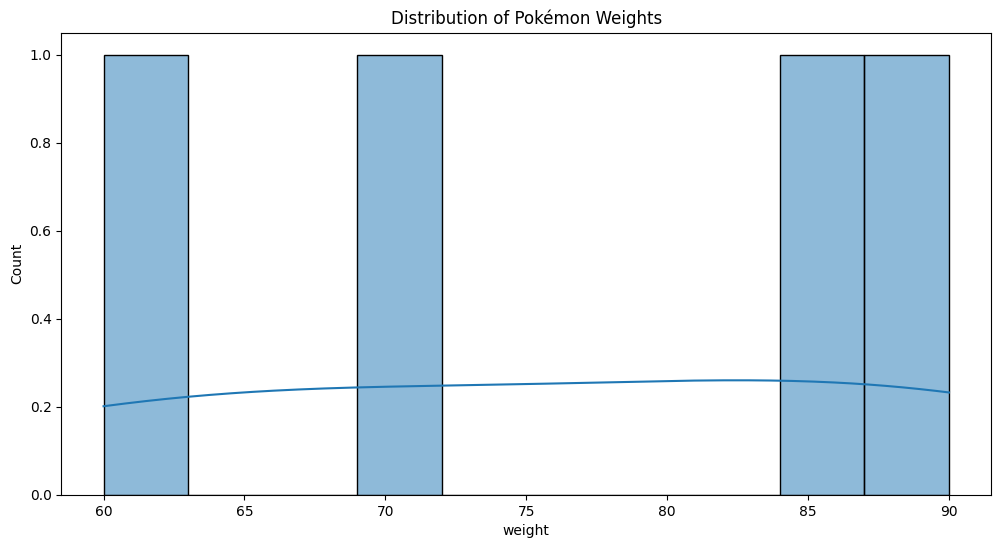

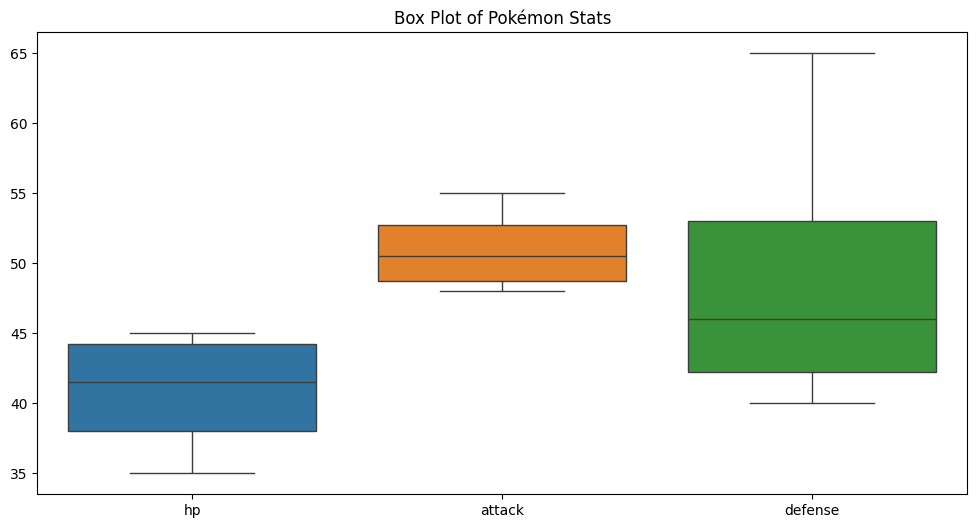

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(df["weight"], bins=10, kde=True)
plt.title("Distribution of Pokémon Weights")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["hp", "attack", "defense"]])
plt.title("Box Plot of Pokémon Stats")
plt.show()
